In [1]:
!pip install kagglehub


In [3]:
import kagglehub

path = kagglehub.dataset_download(
    "bhanupratapbiswas/iris-classification-dataset"
)

print("Dataset path:", path)

100%|██████████| 0.99k/0.99k [00:00<00:00, 2.07MB/s]

Extracting files...
Dataset path: /root/.cache/kagglehub/datasets/bhanupratapbiswas/iris-classification-dataset/versions/1


In [4]:
import os
import pandas as pd

files = os.listdir(path)
files

['IRIS.csv']

In [6]:
df = pd.read_csv(os.path.join(path, "IRIS.csv"))
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [7]:
df.shape


(150, 5)

In [8]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

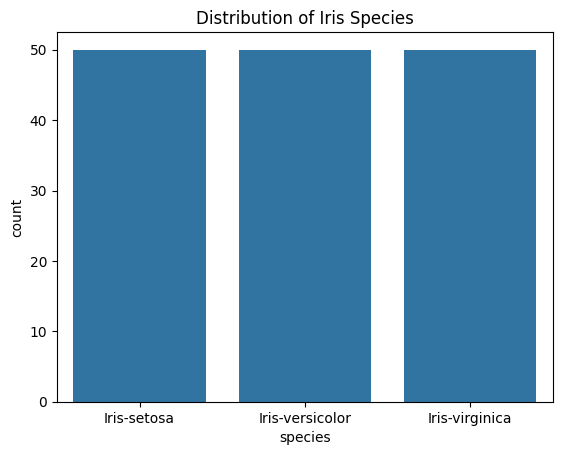

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='species', data=df)
plt.title("Distribution of Iris Species")
plt.show()


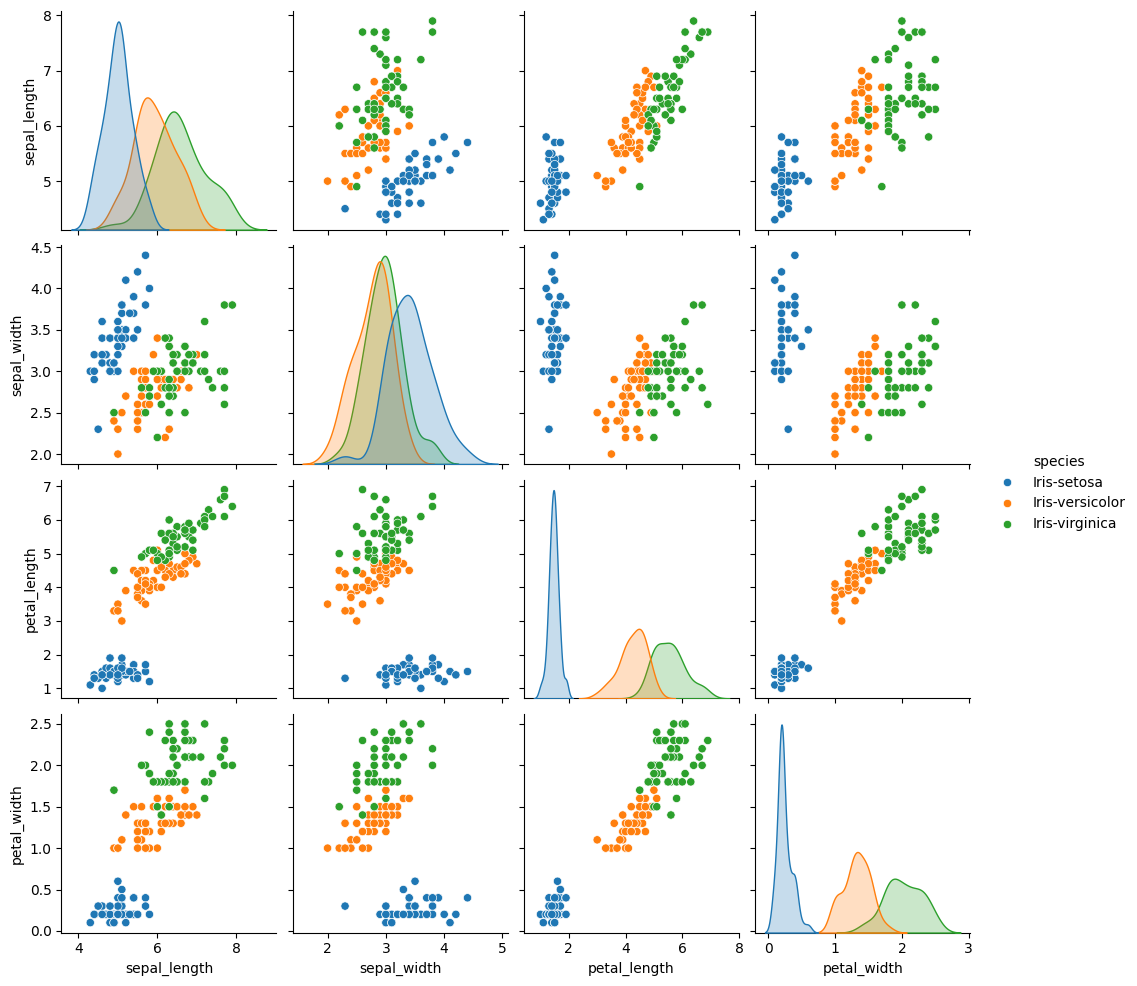

In [14]:
sns.pairplot(df, hue="species")
plt.show()

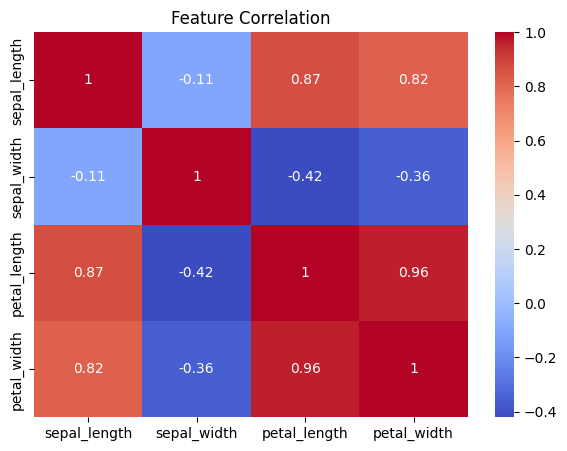

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df.drop(columns=['species']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [18]:
X = df.drop(columns=['species'])
y = df['species']

dataset spliting

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


feature scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model training


knn

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


Evaluation

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))


In [26]:
evaluate("k-NN", y_test, knn_pred)
evaluate("Logistic Regression", y_test, lr_pred)
evaluate("Decision Tree", y_test, dt_pred)



k-NN
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30


Logistic Regression
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weight

model comparison

In [28]:
results = pd.DataFrame({
    "Model": ["k-NN", "Logistic Regression", "Decision Tree"],
    "Accuracy": [
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, dt_pred)
    ]
})

results



Model  Accuracy
0                 k-NN  0.933333
1  Logistic Regression  0.933333
2        Decision Tree  0.900000

Best Model

---



In [29]:
import joblib

joblib.dump(lr, "iris_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Inference Example

In [30]:
model = joblib.load("iris_model.pkl")
scaler = joblib.load("scaler.pkl")

sample = [[6.1, 2.8, 4.7, 1.2]]
sample_scaled = scaler.transform(sample)

prediction = model.predict(sample_scaled)
print("Predicted Species:", prediction[0])


Predicted Species: Iris-virginica
